<h1>Técnicas Avanzadas de Aprendizaje Automático para la Detección de Intrusos en Sistemas Ciber-Físicos: Modelado y Evaluación</h1>

<h2>Introducción</h2>

En esta libreta se crea el modelo correspondiente usando los resultados obtenidos de la libreta `Análisis_y_Preprocesamiento_de_los_Datos.ipynb`.  Concretamente, se explican las siguientes fases de la metodología **CRISP-DM**:

- **Modelado**: Se elige el algoritmo de aprendizaje más adecuado, se realiza la búsqueda de los mejores hiperparámetros y se entrena.
- **Evaluación**: Se evalúan los resultados que ofrece el modelo entrenado en fucnión de los objetivos establecidos en la comprensión del negocio.

Los contenidos que se tratarán en esta libreta son los siguientes:

1. **Cargar los datos preprocesados**. Se cargan los resultados obtenidos de la libreta `Análisis_y_Preprocesamiento_de_los_Datos.ipynb`.
2. **Creación del modelo**. Pertenece a la fase de Modelado.
3. **Evaluación del modelo**. Pertenece a la fase de Evaluación.
4. **Exportar resultados**. Se guardan los resultados obtenidos.


Se han seguido los pasos que se establecen en el artículo: **MADICS: A Methodology for Anomaly Detectionin Industrial Control Systems**, aunque tenía algunos fallos a nivel académico y han sido eliminados y solucionados.

<h2>1. Cargar los datos preprocesados</h2>

En esta sección se cargan los .csv que han sido generados en la libreta anterior:

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")

In [3]:
validation = pd.read_csv("val.csv")

In [4]:
test = pd.read_csv("test.csv")

Se comprueba si los datos se han cargado de manera correcta:

In [5]:
train

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,...,MV303_1,MV303_2,MV304_0,MV304_1,MV304_2,P302_1,P302_2,P602_1,P602_2,Normal/Attack
0,0.894061,0.145253,0.980632,0.966672,0.817110,0.964381,0.000037,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,0.888111,0.144064,0.981095,0.965737,0.818515,0.966238,0.000037,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
2,0.884144,0.144540,0.981095,0.964336,0.822205,0.965394,0.000037,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,0.883677,0.143826,0.981095,0.964336,0.823259,0.965225,0.000037,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
4,0.884611,0.143112,0.981095,0.964959,0.824313,0.966069,0.000037,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295995,0.000000,0.701880,0.988616,0.969320,0.057625,0.240040,0.000037,0.0,0.911708,0.001927,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
295996,0.000000,0.701285,0.989337,0.969320,0.057273,0.239534,0.000037,0.0,0.913510,0.001909,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
295997,0.000000,0.699857,0.989646,0.969320,0.056395,0.241222,0.000037,0.0,0.915023,0.001897,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
295998,0.000000,0.698549,0.989749,0.969320,0.057800,0.240547,0.000037,0.0,0.916826,0.001889,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0


In [6]:
validation

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,...,MV303_1,MV303_2,MV304_0,MV304_1,MV304_2,P302_1,P302_2,P602_1,P602_2,Normal/Attack
0,0.000000,0.695099,0.989594,0.965893,0.055868,0.240209,0.000037,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,0.000000,0.692482,0.989337,0.968229,0.054287,0.241391,0.000037,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
2,0.000000,0.690221,0.989337,0.968541,0.055341,0.240378,0.000037,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,0.000000,0.688913,0.989337,0.968541,0.055341,0.241897,0.000037,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
4,0.000000,0.687247,0.989337,0.970565,0.056219,0.241897,0.000037,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98995,0.896278,0.110992,0.981713,0.960754,0.742444,0.731937,0.000073,0.062149,0.071088,0.001501,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
98996,0.892078,0.110754,0.981713,0.960754,0.742795,0.732612,0.000073,0.061966,0.071199,0.001490,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
98997,0.886944,0.110516,0.982743,0.960754,0.743147,0.733456,0.000073,0.062001,0.071265,0.001493,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
98998,0.884611,0.110635,0.982949,0.960754,0.744201,0.732443,0.000073,0.062238,0.071426,0.001501,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0


In [7]:
test

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,...,MV303_1,MV303_2,MV304_0,MV304_1,MV304_2,P302_1,P302_2,P602_1,P602_2,Normal/Attack
0,0.884144,0.110397,0.982949,0.960754,0.744025,0.732950,0.000073,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,0.891145,0.110516,0.982949,0.960754,0.744025,0.732781,0.000073,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
2,0.906779,0.110397,0.981713,0.957951,0.745431,0.732106,0.000073,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,0.923230,0.110754,0.981713,0.957951,0.746836,0.731768,0.000073,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
4,0.935947,0.112301,0.982022,0.957951,0.748066,0.733625,0.000073,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,0.932563,0.100404,0.988616,0.992369,0.824664,0.797940,0.000000,0.063371,0.058520,0.001667,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
449915,0.928596,0.103022,0.988616,0.992369,0.824840,0.799290,0.000000,0.063253,0.059587,0.001660,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
449916,0.922179,0.103854,0.988873,0.989099,0.823435,0.799796,0.000000,0.063258,0.060898,0.001654,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
449917,0.918446,0.103973,0.988873,0.987385,0.823259,0.801484,0.000000,0.063259,0.062191,0.001647,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0


<h3>1.1. División de los datos</h3>

Se dividen los datos en función de si se trata de la variable clase o las variables predictoras::

In [8]:
X_train = train.drop(columns = "Normal/Attack")
y_train = train["Normal/Attack"]

In [9]:
X_validation = validation.drop(columns = "Normal/Attack")
y_validation = validation["Normal/Attack"]

In [10]:
X_test = test.drop(columns = "Normal/Attack")
y_test = test["Normal/Attack"]

<h2>2. Creación del modelo</h2>

En esta sección se explcia el modelo que hemos elegido (con su correspondiente justificación) debido a la naturaleza del problema y se desarrolla paso a paso:

<h3>2.1. Elegir el modelo</h3>

Para los problemas de detección de anomalías, se recomienda utilizar un modelo de regresión de Deep Learning aplicado a una ventana W porque:

- Modela comportamientos más complejos que el Machine Learning.
- Se adecúa perfectamente a modelar datos de series temporales.

En cuanto al tipo de problema, se debe optar por regresión en vez de clasificación debido a:

- Señales y sensores de ICS siguen un patrón temporal fácilmente modeable por un regresor.
- Adoptar un modelo de regresión junto a un umbral de anomalía genera información sobre el sensor que la causa, favoreciendo el diagnóstico.

En cuanto al diseño del modelo, este recibirá una serie temporal con este formato: $
(x_{0}, x_{1}, \dots, x_{n-1})
$.  A su vez,  $(y_{n+h}, \dots, y_{n+h+m})$ es la salida del modelo, dónde n es la longitud de la ventana, m es número de predicciones futuras a realizar, h es el horizonte de predicción.

Para configurar los hiperparámetros relacionados con los datos de entrada se debe tener en cuenta:

- **n**: La ventana debe ser lo suficientemente grande para capturar el comportamiento del sistema. Se recomienda graficar las características para observar comportamientos repetitivos.
- **h**: El horizonte de predicción especifica el paso de tiempo en el futuro a partir del cual el modelo comienza a predecir. Se sugiere probar diferentes valores para verificar que el modelo de Deep Learning está generalizando, en vez de replicar el último valor de entrada.
- **m**: El número de pasos de tiempo predichos debe ajustarse según el escenario específico. En general, este valor se establecerá en uno.

Para implementar el modelo, se usará la libería **pytorch**. Para cargar los datos, se debe usar un dataset de la misma librería, por lo que se crea una clase personalizada para el dataset. En esta clase, se implementa un método que devuelve lotes de datos (para no tener mucha información a la vez en memoria) en tuplas x e y, representando series temporales hasta hasta $(y_{n+h}, \dots, y_{n+h+m})$:.

Primero, se añaden al código las librerías necesarias:

In [11]:
import torch
from torch.utils.data import Dataset
import numpy as np

Posteriormente se crea la clase personaliza de datos llamada **TimeSeriesDataset**:

In [14]:
class TimeSeriesDataset(Dataset):
    def __init__(self, data, n, h, m, overlap = 1):
        """
        Parámetros:
            data: Serie temporal, es un DataFrame.
            n: Tamaño de la ventana, es un entero.
            h: Horizonte de predicción, es un entero.
            m: Número de predicciones futuras, es un entero.
            overlap: es el solapamiento. Como para cada segundo se requieren
            los 120 segundos anteriores, se usa el overlap para no pasar de 120 en 120. 
            Por defecto, su valor es 1.
        """

        #convertir a float32 para que el entrenamiento sea más rápido
        if isinstance(data, np.ndarray):
            self.data = torch.tensor(data, dtype=torch.float32)
        else:
            self.data = torch.tensor(data.values, dtype=torch.float32)

        self.n = n
        self.h = h
        self.m = m
        self.overlap = overlap
        
        #cantidad de muestras posibles del dataset
        self.num_samples = (len(self.data) - (n + h + m) + 1)// self.overlap

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        """
        getitem: Devuelve la muestra correspondiente al índice dado.

        Devuelve:
            - x: ventana de tamaño n.
            - y: un valor futuro después de un horizonte h (tamaño 1).
        """
        real_idx = idx*self.overlap
        #ventana de entrada de tamaño n, con lo que se entrena
        x = self.data[real_idx:real_idx+self.n]

        #se quiere predecir el valor[n+m+h], por lo que se compara con el real
        y = self.data[real_idx+self.n+self.h:real_idx+self.n+self.h+self.m].reshape(-1)

        return x, y

A continuación, se configuran los hiperparámetros de los datos de entrada y se dejan preparados los generadores de datos. Se usan los siguientes hiperparámetros:

- **n = 120**: Con una ventana de 120 segundos se capturan suficiente información sobre el pasado más reciente de los diferentes sensores y actuadores.
- **h = 10**: Se establece un valor mayor que uno debido a que las redes neuronales tienden a reproducir el último valor cuando el horizonte de predicción es cercano a la entrada.
- **m = 1**: Solo interesa predecir el siguiente valor, por lo que lo se deja a uno.


In [15]:
n = 120  #tamaño de la ventana
h = 10   #horizonte de predicción
m = 1    #número de predicciones futuras

#creación de los datasets
train_dataset = TimeSeriesDataset(X_train, n, h, m)
val_dataset = TimeSeriesDataset(X_validation, n, h, m)

#creación de los dataloaders
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    num_workers=2,      #para cargar los datos más rápido
    pin_memory=True     #optimiza la transferencia de los datos a la GPU
)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
    num_workers=2,      #para cargar los datos más rápido
    pin_memory=True     #optimiza la transferencia de los datos a la GPU
)

<h3>2.2. Buscar los mejores hiperparámetros</h3>

Una vez elegido el modelo y establecidos los hiperparámetros de los datos de entrada, se debe entrenar y hacer fine-tuning al modelo. En este caso, se realizará:

- **Grid Search**: Realiza una búsqueda exhaustiva en la que se prueban todas las posibles configuraciones de hiperparámetros y se queda con la mejor combinación. Es muy costosa en cuanto a tiempo pero asegura los mejores resultados dentro de los hiperparámetros definidos.

Para comprobar que tan buenas son estas configuraciones, se utilizará el **MAE (Mean Absolute Error)**, ya que el modelo usará este tipo de error.

A continuación, se muestran los pasos necesarios para realizar el **Grid Search** correspondiente.

Primero se instalan las librerías necesarias:

In [16]:
import torch.nn as nn

Se crea la función para construir el modelo. Algo que se debe tener en cuenta es que se usan capas LSTM en este problema de detección de anomalías con serires temporales por las siguientes razones:

- Las Redes Densas o RNNs estándar no pueden recordar información muy antigua debido al problema de <u>desvanecimiento del gradiente</u>.

- Las celdas de las **LSTM (Long Short-Term Memory)** presentan puertas que permiten recordar información mucho más anterior que en una recurrente, consiguiendo capturar mejores patrones de largo plazo. Además, evita el problema de desvanecimiento del gradiente.

- las celdas LSTM presentan mejor resultado que las GRU (Gated Recurrent Units), ya que son una versión simplifiada de las LSTM, aunque son más rápidas. Se prefiere obtener mejor rendimiento a pesar de un mayor coste de entrenamiento.


La siguiente clase recibe como parámetro la cantidad de capas y neuronas por capa LSTM y capa densa, además de la función de activación correspondiente:

In [17]:
class LSTMPredictor(nn.Module):
        def __init__(self, input_size, lstm_neurons, dense_neurons, activation, output_size):
            super(LSTMPredictor, self).__init__()
    
            self.lstm_layers = nn.ModuleList()
            self.dense_layers = nn.ModuleList()
    
            activations = {
                'relu': nn.ReLU(),
                'sigmoid': nn.Sigmoid()
            }
            self.activation = activations.get(activation, nn.ReLU())  # ReLU por defecto
    
            #para agregar las capas LSTM
            for i in range(len(lstm_neurons)):
                input_dim = input_size if i == 0 else lstm_neurons[i-1]
                self.lstm_layers.append(nn.LSTM(input_dim, lstm_neurons[i], batch_first=True))
    
            #para agregar las capas densas
            for i in range(len(dense_neurons)):
                input_dim = lstm_neurons[-1] if i == 0 else dense_neurons[i-1]
                self.dense_layers.append(nn.Linear(input_dim, dense_neurons[i]))
    
            #para generar la capa de salida
            self.output_layer = nn.Linear(dense_neurons[-1], output_size)

            #guardar la media, la desviación estándar y los errores en validación
            self.register_buffer("train_mean", torch.tensor(0.0))
            self.register_buffer("train_std", torch.tensor(1.0))
            self.register_buffer("val_errors", torch.tensor([]))
    
        def forward(self, x):
            #pasa por las capas LSTM
            for lstm in self.lstm_layers:
                x, _ = lstm(x)
            #se toma el último estado
            x = x[:, -1, :]
    
            #pasa por las capas densas
            for dense in self.dense_layers:
                x = self.activation(dense(x))
            #capa de salida
            x = self.output_layer(x)
            return x

A su vez, se crea la función para instanciar la clase del modelo:

In [18]:
def build_model(input_size, lstm_neurons, dense_neurons, activation, output_size):
    """
    build_model: Construye un modelo LSTM en PyTorch para regresión de series temporales.

    Parámetros:
        input_size: Número de características de entrada, es un entero.
        lstm_neurons: Lista con el número de neuronas en cada capa LSTM, es una lista.
        dense_neurons: Lista con el número de neuronas en cada capa densa, es una lista.
        activation: Función de activación de las capas densas ('relu', 'sigmoid'), es una lista.
        output_size: Número de características de salida, es un entero.

    Devuelve:
        Modelo preparado para entrenar.
    """
    return LSTMPredictor(input_size, lstm_neurons, dense_neurons, activation, output_size)


El siguiente paso a realizar es configurar el espacio de búsqueda de hiperparámetros. Para ello, se crear un diccionario en el que vamos a establecer:

- Número de nueronas por capa LSTM. Se comprueba si es mejor con 2 o 3 capas.
- Número de neuronas por capa densa. Se comprueba si es mejor con 1 o 2 capas.
- Función de activación. Se utiliza la función de activación ReLU.

Finalmente se crea el código para realizar el **Grid Search**. Se explica detalladamente como funciona en el archivo de Python `grid_search.py`. Los resultados de este se pueden apreciar en el `README` de la carpeta de **Resultados**.

In [19]:
import torch.optim as optim
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

Una vez conocida la mejor combinación de capas LSTM y capas densas, se crea el diccionario para poder entrenar el modelo:

In [21]:
best_grid = {
    'lstm_neurons': [200, 130],
    'dense_neurons': [256],
    'activation': 'relu',
    'epochs': 6 #6 epochs de entrenamiento para el modelo
}

<h3>2.3. Entrenar el modelo</h>

Una vez completados los pasos anteriores, es momento de entrenar el modelo. A continuación, se explican los pasos necesarios para ello.

Al igual que para hacer el grid search, se debe crear el generador de datos para el conjunto de test:

In [22]:
#creación del dataset para el conjunto de test
test_dataset = TimeSeriesDataset(X_test, n, h, m)

#dataloader para los datos de test
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    num_workers=2,      #para cargar los datos más rápido
    pin_memory=True     #optimiza la transferencia de los datos a la GPU
)

Antes de poder entrenar, se debe crear una función auxiliar para calcular el error durante el proceso. Para calcular el error entre el resultado predicho por la red nueronal $\hat{y}$ y el valor real en el dataset $y$ se usa el valor absoluto:

$e = \left| y - \hat{y} \right|$

Dicha tarea la cumple la función **computa_error**:

In [23]:
def computa_error(y_true, y_pred):
    """
    computa_error: Calcula el error absoluto entre las predicciones y los valores verdaderos.

    Parámetros:
    y_true: Vector que contien los valores reales del dataset, es un array de NumPy.
    y_pred: Vector que contiene las predicciones realiadas por la red neuronal, es un array de NumPy.
    
    Devuelve:
        -error absoluto entre el vector de predicciones y el de valores reales.
    """
    error = torch.abs(y_true - y_pred).detach().cpu().numpy() #error por variable
    return error


Una vez los datos ya están preparados y la configuración del modelo está lista, es momento de crear la función que se encargará de entrenar el modelo. Se explica cada paso mediante los comentarios en el código correspondiente.

In [24]:
from torch.amp import GradScaler
from torch.amp import autocast

In [25]:
def train_model(build_model, best_grid, train_loader, val_loader, output_size, device='cpu'):
    """
    train_model: Función que entrena el modelo de detección de anomalías en Pytorch y que guarda dicho modelo.

    Parámetros:
    build_model: Función diseñada para construir el modelo de forma dinámica. Recibe la lista con las neuronas
    correspondientes y devuelve el modelo, es una función.
    best_grid: Diccionario que contiene la mejor combinación de hiperparámetros, es un diccionario.
    train_loader: Es el DataLoader creado para cargar los datos de entrenamiento, es un DataLoader.
    val_loader: Es el DataLoader creado para cargar los datos de validación, es un DataLoader.
    output_size: Es el tamaño de la capa de salida, es un entero.
    device='cpu': Dispositivo dónde se entrena el modelo, por defecto es la cpu.
    
    Devuelve:
        Entrena el modelo y guarda checkpoints en las épocas 2,4,5,6 y el modelo final.
    """
    #obtener un batch de los datos de train loader
    X_sample, _ = next(iter(train_loader))
    #establecer el tamaño de la entrada de la red a la cantidad
    #de columnas del dataset, al igual que en la función
    #del grid_search
    input_size = X_sample.shape[2]

    #crear el modelo con la función build_model y el diccionario
    #de best_params
    model = build_model(
            input_size=input_size,
            lstm_neurons=best_grid['lstm_neurons'],
            dense_neurons=best_grid['dense_neurons'],
            activation=best_grid['activation'],
            output_size=output_size
    ).to(device)

    #utilizar el optimizador Adam con learning rate 0.0001
    #para evitar el problea de explosión de gradiente
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    #establecer que la función de pérdida a usar
    #es el error absoluto medio (MAE)
    loss_fn = nn.L1Loss()
    scaler = GradScaler(device='cuda')
    
    #realizar tantas épocas como indique el diccionario best_grid
    for epoch in range(best_grid['epochs']):
        #activar el modo de entrenamiento
        model.train()
        train_loss = 0.0 #inicializar la pérdida
        train_errors = [] #lista para errores del train
        #progress_bar para tener un pco más de información durante el entrenamiento
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{best_grid['epochs']}",
                            leave=False, mininterval=10)

        #para todos los batches durante esta época, convertir los datos a float32 para
        #que el entrenamiento sea más rápido
        for X_batch, y_batch in progress_bar:
            X_batch = X_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            #resetear los gradientes para realizar el entrenamiento
            #en la epoch actual
            optimizer.zero_grad()
            #obtener las predicciones del modelo
            with autocast(device_type='cuda'):
                y_pred = model(X_batch)
                y_batch = y_batch.view(y_batch.shape[0], -1)
                loss = loss_fn(y_pred, y_batch)
            
            #usar el scaler para backpropagation
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            #aumentar la pérdida del entrenamiento
            train_loss += loss.item()

            #actualizar la barra de progreso
            #progress_bar.set_postfix(loss=f"{train_loss / len(train_loader):.4f}")
        print(f"Epoch {epoch + 1}/{best_grid['epochs']} - Train Loss: {train_loss / len(train_loader):.4f}")
        
        #para guardar resultados
        if epoch + 1 <= 10:
            train_errors, val_errors = evalua_y_guarda_results(model, train_loader, val_loader, device)
            # Guardar estadísticas de entrenamiento y el modelo final
            model.train_mean = torch.tensor(np.mean(train_errors)).to(device)
            model.train_std = torch.tensor(np.std(train_errors)).to(device)
            model.val_errors = torch.tensor(val_errors).to(device)
            model_path = f"model_epoch_{epoch + 1}.pt"
            scripted_model = torch.jit.script(model)
            torch.jit.save(scripted_model, model_path)
            print(f"Modelo guardado en: {model_path}")

Para considerar un registro como anomalía, se utilizarán umbrales basados en Z-Scores con los datos de validación. Para calcularlos, se deben realizar los siguientes pasos:


1. Calcular la **Media** y la **Desviación Estándar** de los errores del conjunto de entrenamiento.

2. Calcular los **Z-Scores** con los errores de validación. Para ello, se utiliza la siguiente fórmula:

   $z_e = \frac{e_v - \mu_e}{\sigma_e}$

  Siendo $\mu_e$ la media del error en los datos de entrenamiento y $\sigma_e$ la desviación estándar en los datos de entrenamiento.

Una vez calculamos los Z-Scores en validación, toca definir un umbral para decidir si se trata de una anomalía o no. En este caso, se calcula un umbral por característica a partir máximo del Z-Score calculado en validación. Si para una muestra en el test tiene mayor Score al umbral anterior, se considerará anomalía.

Para evitar que se carguen más datos en la evaluación, se integran la **Media** del train, la **Desviación Estándar** del train y los **Errores** de validación en el modelo. Esta tarea la realiza la función **evalua_y_guarda_results**.

In [26]:
def evalua_y_guarda_results(model, train_loader, val_loader, device = "cpu"):
    """
    evalua_y_guarda_results: Calcula los errores en la última epoch tanto para train como para validación.

    Parámetros
        model: Modelo sobre el que se quieren guardar los datos. Es un modelo de torch.
        train_loader: Es el DataLoader creado para cargar los datos de entrenamiento, es un DataLoader.
        val_loader: Es el DataLoader creado para cargar los datos de validación, es un DataLoader.
        device='cpu': Dispositivo dónde se entrena el modelo, por defecto es la cpu.
        
    
    Devuelve:
        -train_errors: Lista de errores del train, es un array de NumPy.
        -val_errors_tensor: Lista de errores de validación, es un tensor de torch.
    """
    model.eval()
    train_errors = []
    print("Calculando los errores en el entrenamiento...")
    with torch.no_grad():
        for X_batch, y_batch in tqdm(train_loader, desc="Calculando errores en entrenamiento", leave= False, mininterval=10):
            X_batch = X_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            y_pred = model(X_batch)
            error = computa_error(y_batch, y_pred)
            train_errors.append(error)
    
    train_errors = np.concatenate(train_errors, axis = 0)
    print("Calculando los errores en validación...")
    val_errors = []
    with torch.no_grad():
        for X_batch, y_batch in tqdm(val_loader, desc="Calculando errores en validación", leave= False, mininterval=10):
            X_batch = X_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            y_pred = model(X_batch)
            error = computa_error(y_batch, y_pred)
            error_tensor = torch.tensor(error).to(device)  #convertir el error a tensor de PyTorch
            val_errors.append(error_tensor)

    #concatenar todos los errores de validación
    val_errors_tensor = torch.cat(val_errors, dim=0)

    return train_errors, val_errors_tensor

Se llama a la función para entrenar el modelo. En este caso, se cambia el parámetro `device="cuda"` para entrenar más rápido.

In [33]:
train_model(build_model, best_grid, train_loader, val_loader, X_train.shape[1], device="cuda")

Epoch 1/6 - Train Loss: 0.0104
Calculando los errores en el entrenamiento...


Calculando los errores en validación...


/tmp/ipykernel_19/1230516913.py:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model.val_errors = torch.tensor(val_errors).to(device)


Modelo guardado en: model_epoch_1.pt


Epoch 2/6 - Train Loss: 0.0090
Calculando los errores en el entrenamiento...


Calculando los errores en validación...


Modelo guardado en: model_epoch_2.pt


Epoch 3/6 - Train Loss: 0.0087
Calculando los errores en el entrenamiento...


Calculando los errores en validación...


Modelo guardado en: model_epoch_3.pt


Epoch 4/6 - Train Loss: 0.0084
Calculando los errores en el entrenamiento...


Calculando los errores en validación...


Modelo guardado en: model_epoch_4.pt


Epoch 5/6 - Train Loss: 0.0077
Calculando los errores en el entrenamiento...


Calculando los errores en validación...


Modelo guardado en: model_epoch_5.pt


Epoch 6/6 - Train Loss: 0.0070
Calculando los errores en el entrenamiento...


Calculando los errores en validación...


Modelo guardado en: model_epoch_6.pt


<h2>3. Evaluación del modelo</h2>

Ahora es momento de evaluar el modelo entrenado. Para ello, se utiliza la función **evaluate_model**, y se explica con los comentarios cómo funciona:

In [31]:
def evaluate_model(model_path, test_loader, y_test_true, device='cuda'):
    """
    evaluate_model: Obtiene los resultados del modelo con los datos del test cargando los errores de
    train y validación guardados en el modelo.
    
    Parámetros:
    model_path: Ruta para cargar el modelo a evualuar, es una string.    
    test_loader: Es el DataLoader que hemos creado para cargar los datos de test, es un DataLoader.
    y_test_true: Vector que contiene los valores de la etiqueta clase de los datos de test, es un vector de NumPy.

    Devuelve:
        df_results: DataFrame con la salida del modelo (con las filas predichas), es un DataFrame.
    
    """
    #cargar el modelo guardado
    model = torch.jit.load(model_path, map_location=device)
    print(f"Modelo cargado desde {model_path}")
    
    #activar el modo de evaluación
    model.eval()
    
    #se lee la media la s.d. guardados en el modelo
    train_mean = model.train_mean.cpu().numpy()
    train_std = model.train_std.cpu().numpy()
    val_errors = model.val_errors.cpu().numpy()


    #calcular los z-score en el conjunto de validación
    val_z_scores = (val_errors - train_mean) / train_std

    #definir el umbral para detectar anomalías: el máximo
    feature_thresholds = np.max(val_z_scores, axis=0)#umbral por variable

    #definir array vacío para los errores en el test
    test_errors = []
    test_predictions = []
    y_test_real = []
    #desactivar el cálculo de gradientes
    with torch.no_grad():
        for X_batch, y_batch in tqdm(test_loader):
            X_batch = X_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            y_pred = model(X_batch)
            #calcular el error en el test con la función computa_error
            error = computa_error(y_batch, y_pred)
            test_errors.append(error)
            test_predictions.append(y_pred.cpu().numpy()) #guardar predicciones
            y_test_real.append(y_batch.cpu().numpy())
            
    #concatenar todos los errores de test
    test_errors = np.concatenate(test_errors, axis=0)
    test_predictions = np.concatenate(test_predictions, axis=0)
    y_test_real = np.concatenate(y_test_real, axis=0)
    print(f"Longitud de test_errors: {len(test_errors)}")

    #Calcular el z-score en el conjunto de prueba
    test_z_scores = (test_errors - train_mean) / train_std

    #detectar las anomalías usando el umbral definido en validación
    anomalies_por_feature = test_z_scores > feature_thresholds #matriz de anomalias

    #crear un array con las variables que causaron anomalía por fila
    anomalies_list = [np.where(row)[0].tolist() if row.any() else [] for row in anomalies_por_feature]

    #convertir la detección de anomalías a binario (si alguna variable es anomalía, la fila es anomalía)
    anomalies = anomalies_por_feature.any(axis=1).astype(int)

    print(f"Anomalías detectadas en el conjunto de prueba: {np.sum(anomalies)}")

    #ajustar dimensiones
    min_length = min(len(anomalies), len(y_test_true), len(test_predictions))
    anomalies = anomalies[:min_length]
    anomalies_list = anomalies_list[:min_length]
    y_test_true = y_test_true[:min_length]
    test_predictions = test_predictions[:min_length]
    y_test_real = y_test_real[:min_length]

    print(f"Shape corregido de anomalies: {len(anomalies)}")
    print(f"Shape corregido de y_test_true: {len(y_test_true)}")

    #crear un DataFrame con los resultados
    df_results = pd.DataFrame({
        'Predicción': list(test_predictions),  #guardar las predicciones del modelo
        'Anomalía': anomalies,  #1 si es anomalía, 0 si es normal
        'Variables_Anómalas': anomalies_list  #lista de variables que causan la anomalía
    })
    #llamar a la función calcula_metricas para conocer el redimiento del modelo
    print("Calculando métricas de rendimiento para el conjunto de prueba...")
    calcula_metricas(y_test_true, anomalies)

    return df_results

Para poder evaluar el modelo, se deben usar diferentes métricas de evaluación. En este caso, hay que conocer que

- **Precisión**: Esta métrica ayuda a conocer si el modelo tiene muchos falsos positivos.
- **Recall**: Esta métrica indica el número de anomalías predichas por el modelo en función de las anomalías totales.

Se busca un equilibrio entre dichas métricas y nos fijaremos en el **F1-Score**. 
También se muestra el accuracy y la matriz de confusión para tener más información. De este paso se ocupará la función **calcula_metricas**:

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [33]:
def calcula_metricas(true_labels, predicted_labels):
    """
    calcula_metricas: Calcula e imprime las métricas de Precision, Recall, F1-Score, Accuracy y la matriz de confusión.

    Parámetros:
    true_labels: Etiquetas reales de anomalías (1 para anomalía, 0 para normal), es un vector.
    predicted_labels: Etiquetas predichas por el modelo (1 para anomalía, 0 para normal), es un vector.

    Devuelve:
        -precision: Precisión del modelo.
        -recal: Recall del modelo.
        -f1: F1-Score del modelo.
    """

    
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    cm = confusion_matrix(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    #para imprimir la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anomalía"], yticklabels=["Normal", "Anomalía"])
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title("Matriz de Confusión")
    plt.show()
    
    return precision, recall, f1

El modelo no predecirá hasta pasados los primeros 130 segundos. Para poder comparar los resultados reales, hay que quitar dichos registros en la etiqueta predictora:

In [34]:
y_real =y_test.values[130:]
y_real

array([0, 0, 0, ..., 0, 0, 0])

Se llama a la función **evaluate_model** para evaluar el rendimiento del modelo:

Modelo cargado desde model_epoch_6.pt


100%|██████████████████████████████████| 449789/449789 [12:10<00:00, 615.87it/s]


Longitud de test_errors: 449789
Anomalías detectadas en el conjunto de prueba: 60603
Shape corregido de anomalies: 449789
Shape corregido de y_test_true: 449789
Calculando métricas de rendimiento para el conjunto de prueba...
Precision: 0.6805
Recall: 0.7550
F1-Score: 0.7158
Accuracy: 0.9272


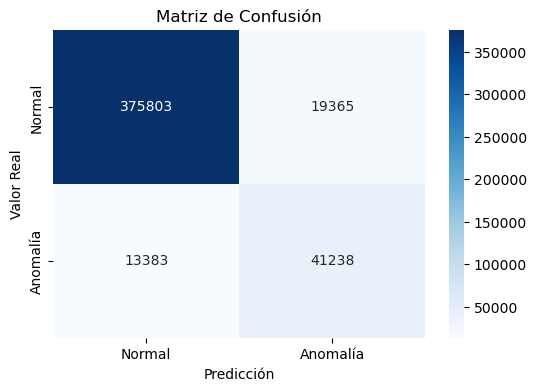

In [37]:
df_resultados = evaluate_model("model_epoch_6.pt",test_loader,y_real)

<h3>4. Exportar resultados</h3>

Una vez entrenado y evaluado el modelo, es momento de exportar los resultados de las predicciones del modelo. Se realizan las transformaciones correspondientes al DataFrame devuelto por la función **evaluate_model** para que tenga un formato más legible.

Se muestra el formato del DataFrame devuelto:

In [38]:
df_resultados

,Predicción,Anomalía,Variables_Anómalas
0,"[0.8674234, 0.17414367, 0.9756517, 0.94993854,...",0,[]
1,"[0.8684834, 0.17328873, 0.97632176, 0.95126814...",0,[]
2,"[0.8718623, 0.17345837, 0.9781587, 0.9542827, ...",0,[]
3,"[0.8745762, 0.17338717, 0.9796381, 0.95655334,...",0,[]
4,"[0.88145113, 0.17322809, 0.9806627, 0.9578209,...",0,[]
...,...,...,...
449784,"[0.87339485, 0.17098877, 0.9796256, 0.95657915...",0,[]
449785,"[0.8725362, 0.17086312, 0.9791974, 0.955965, 0...",0,[]
449786,"[0.8709346, 0.17064169, 0.9783793, 0.95469505,...",0,[]
449787,"[0.86974514, 0.17054108, 0.97777486, 0.9537713...",0,[]


In [39]:
pred_df = pd.DataFrame(df_resultados["Predicción"].to_list(), columns=[f"Pred_{i}" for i in range(len(df_resultados["Predicción"][0]))])

#concatenar con el DataFrame original
salida_modelo = pd.concat([ pred_df, df_resultados[["Anomalía", "Variables_Anómalas"]]], axis=1)
salida_modelo

,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4,Pred_5,Pred_6,Pred_7,Pred_8,Pred_9,...,Pred_34,Pred_35,Pred_36,Pred_37,Pred_38,Pred_39,Pred_40,Pred_41,Anomalía,Variables_Anómalas
0,0.867423,0.174144,0.975652,0.949939,0.853789,0.939187,-0.001590,0.063017,0.058943,-0.007066,...,-0.000270,-0.001250,0.986914,-0.004249,0.012097,0.978778,1.001349,-0.002178,0,[]
1,0.868483,0.173289,0.976322,0.951268,0.856305,0.940386,-0.001524,0.063159,0.062008,-0.007442,...,-0.000348,-0.001302,0.988267,-0.004401,0.012046,0.980064,1.002021,-0.002192,0,[]
2,0.871862,0.173458,0.978159,0.954283,0.860965,0.944892,-0.001444,0.063063,0.065727,-0.007670,...,-0.000387,-0.001367,0.990406,-0.004487,0.011558,0.982634,1.003372,-0.002253,0,[]
3,0.874576,0.173387,0.979638,0.956553,0.864572,0.948062,-0.001378,0.062957,0.068579,-0.007847,...,-0.000451,-0.001425,0.992103,-0.004586,0.011192,0.984614,1.004434,-0.002298,0,[]
4,0.881451,0.173228,0.980663,0.957821,0.866907,0.950570,-0.001363,0.062968,0.070138,-0.007851,...,-0.000534,-0.001508,0.993231,-0.004658,0.010972,0.985832,1.005093,-0.002384,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449784,0.873395,0.170989,0.979626,0.956579,0.865370,0.945684,-0.001352,0.063220,0.069692,-0.008163,...,-0.000470,-0.001477,0.992523,-0.004786,0.011193,0.984896,1.004543,-0.002278,0,[]
449785,0.872536,0.170863,0.979197,0.955965,0.864462,0.944706,-0.001366,0.063287,0.069101,-0.008152,...,-0.000455,-0.001464,0.992113,-0.004773,0.011311,0.984379,1.004262,-0.002264,0,[]
449786,0.870935,0.170642,0.978379,0.954695,0.862533,0.942696,-0.001397,0.063374,0.067697,-0.008096,...,-0.000434,-0.001437,0.991256,-0.004747,0.011540,0.983315,1.003691,-0.002236,0,[]
449787,0.869745,0.170541,0.977775,0.953771,0.861113,0.941306,-0.001421,0.063444,0.066651,-0.008048,...,-0.000414,-0.001416,0.990621,-0.004721,0.011708,0.982534,1.003271,-0.002216,0,[]


In [40]:
#crear un diccionario de mapeo entre los nombres Pred_X y los nombres originales
mapeo_nombres = {f"Pred_{i}": X_train.columns[i] for i in range(42)}

#renombrar las columnas usando el diccionario
salida_modelo.rename(columns=mapeo_nombres, inplace=True)
salida_modelo

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,...,MV303_2,MV304_0,MV304_1,MV304_2,P302_1,P302_2,P602_1,P602_2,Anomalía,Variables_Anómalas
0,0.867423,0.174144,0.975652,0.949939,0.853789,0.939187,-0.001590,0.063017,0.058943,-0.007066,...,-0.000270,-0.001250,0.986914,-0.004249,0.012097,0.978778,1.001349,-0.002178,0,[]
1,0.868483,0.173289,0.976322,0.951268,0.856305,0.940386,-0.001524,0.063159,0.062008,-0.007442,...,-0.000348,-0.001302,0.988267,-0.004401,0.012046,0.980064,1.002021,-0.002192,0,[]
2,0.871862,0.173458,0.978159,0.954283,0.860965,0.944892,-0.001444,0.063063,0.065727,-0.007670,...,-0.000387,-0.001367,0.990406,-0.004487,0.011558,0.982634,1.003372,-0.002253,0,[]
3,0.874576,0.173387,0.979638,0.956553,0.864572,0.948062,-0.001378,0.062957,0.068579,-0.007847,...,-0.000451,-0.001425,0.992103,-0.004586,0.011192,0.984614,1.004434,-0.002298,0,[]
4,0.881451,0.173228,0.980663,0.957821,0.866907,0.950570,-0.001363,0.062968,0.070138,-0.007851,...,-0.000534,-0.001508,0.993231,-0.004658,0.010972,0.985832,1.005093,-0.002384,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449784,0.873395,0.170989,0.979626,0.956579,0.865370,0.945684,-0.001352,0.063220,0.069692,-0.008163,...,-0.000470,-0.001477,0.992523,-0.004786,0.011193,0.984896,1.004543,-0.002278,0,[]
449785,0.872536,0.170863,0.979197,0.955965,0.864462,0.944706,-0.001366,0.063287,0.069101,-0.008152,...,-0.000455,-0.001464,0.992113,-0.004773,0.011311,0.984379,1.004262,-0.002264,0,[]
449786,0.870935,0.170642,0.978379,0.954695,0.862533,0.942696,-0.001397,0.063374,0.067697,-0.008096,...,-0.000434,-0.001437,0.991256,-0.004747,0.011540,0.983315,1.003691,-0.002236,0,[]
449787,0.869745,0.170541,0.977775,0.953771,0.861113,0.941306,-0.001421,0.063444,0.066651,-0.008048,...,-0.000414,-0.001416,0.990621,-0.004721,0.011708,0.982534,1.003271,-0.002216,0,[]


In [41]:
nombres_variables = salida_modelo.columns[:-2].tolist()

#convertir los índices en nombres
salida_modelo["Variables_Anómalas"] = salida_modelo["Variables_Anómalas"].apply(lambda indices: [nombres_variables[i] for i in indices])

In [42]:
salida_modelo

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,...,MV303_2,MV304_0,MV304_1,MV304_2,P302_1,P302_2,P602_1,P602_2,Anomalía,Variables_Anómalas
0,0.867423,0.174144,0.975652,0.949939,0.853789,0.939187,-0.001590,0.063017,0.058943,-0.007066,...,-0.000270,-0.001250,0.986914,-0.004249,0.012097,0.978778,1.001349,-0.002178,0,[]
1,0.868483,0.173289,0.976322,0.951268,0.856305,0.940386,-0.001524,0.063159,0.062008,-0.007442,...,-0.000348,-0.001302,0.988267,-0.004401,0.012046,0.980064,1.002021,-0.002192,0,[]
2,0.871862,0.173458,0.978159,0.954283,0.860965,0.944892,-0.001444,0.063063,0.065727,-0.007670,...,-0.000387,-0.001367,0.990406,-0.004487,0.011558,0.982634,1.003372,-0.002253,0,[]
3,0.874576,0.173387,0.979638,0.956553,0.864572,0.948062,-0.001378,0.062957,0.068579,-0.007847,...,-0.000451,-0.001425,0.992103,-0.004586,0.011192,0.984614,1.004434,-0.002298,0,[]
4,0.881451,0.173228,0.980663,0.957821,0.866907,0.950570,-0.001363,0.062968,0.070138,-0.007851,...,-0.000534,-0.001508,0.993231,-0.004658,0.010972,0.985832,1.005093,-0.002384,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449784,0.873395,0.170989,0.979626,0.956579,0.865370,0.945684,-0.001352,0.063220,0.069692,-0.008163,...,-0.000470,-0.001477,0.992523,-0.004786,0.011193,0.984896,1.004543,-0.002278,0,[]
449785,0.872536,0.170863,0.979197,0.955965,0.864462,0.944706,-0.001366,0.063287,0.069101,-0.008152,...,-0.000455,-0.001464,0.992113,-0.004773,0.011311,0.984379,1.004262,-0.002264,0,[]
449786,0.870935,0.170642,0.978379,0.954695,0.862533,0.942696,-0.001397,0.063374,0.067697,-0.008096,...,-0.000434,-0.001437,0.991256,-0.004747,0.011540,0.983315,1.003691,-0.002236,0,[]
449787,0.869745,0.170541,0.977775,0.953771,0.861113,0.941306,-0.001421,0.063444,0.066651,-0.008048,...,-0.000414,-0.001416,0.990621,-0.004721,0.011708,0.982534,1.003271,-0.002216,0,[]


Se guarad el modelo como `.csv` de manera local:

In [44]:
salida_modelo.to_csv("salida_modelo.csv", index=False)